In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 불러오기
file_name = glob("healthcare*.csv")
df = pd.read_csv(file_name[0])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [4]:
# 성별 "Other" 제거를 위한 인덱스 번호 확인
df[df["gender"]=="Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [5]:
# 성별 "Other" 행 제거 및 인덱스 리셋
df = df.drop(index = 3116)
df = df.reset_index()

In [6]:
# 인덱스 칼럼 제거
df = df.drop(columns = "index")

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
#칼럼 추가: 연령대 별 나이 그룹화
age_list=[]
for age in df["age"]:
    if age >= 0 and age <10:
        age_list.append("10대 이전")
    elif age >= 10 and age <20:
        age_list.append("10대")
    elif age >= 20 and age <30:
        age_list.append("20대")
    elif age >= 30 and age <40:
        age_list.append("30대")
    elif age >= 40 and age <50:
        age_list.append("40대")
    elif age >= 50 and age <60:
        age_list.append("50대")
    elif age >= 60 and age <70:
        age_list.append("60대")
    elif age >= 70 and age <80:
        age_list.append("70대")
    elif age >= 80 and age <90:
        age_list.append("80대")
    
df["age_group"] = age_list

In [9]:
# 연령 순으로 정렬
df= df.sort_values(by = "age")

<AxesSubplot: xlabel='age_group', ylabel='stroke'>

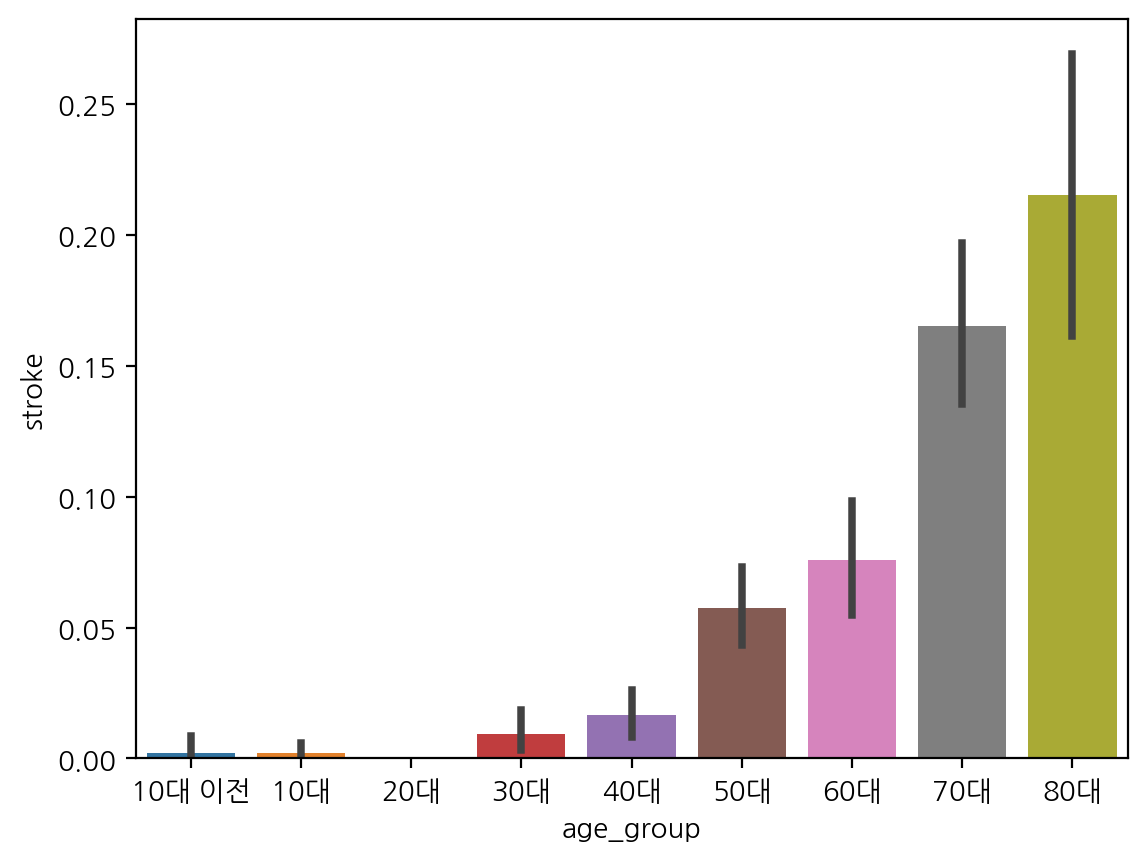

In [10]:
# 연령대 별 뇌졸중 환자 분포 그래프
sns.barplot(data = df, x = "age_group",y = "stroke")

<AxesSubplot: xlabel='age_group', ylabel='Count'>

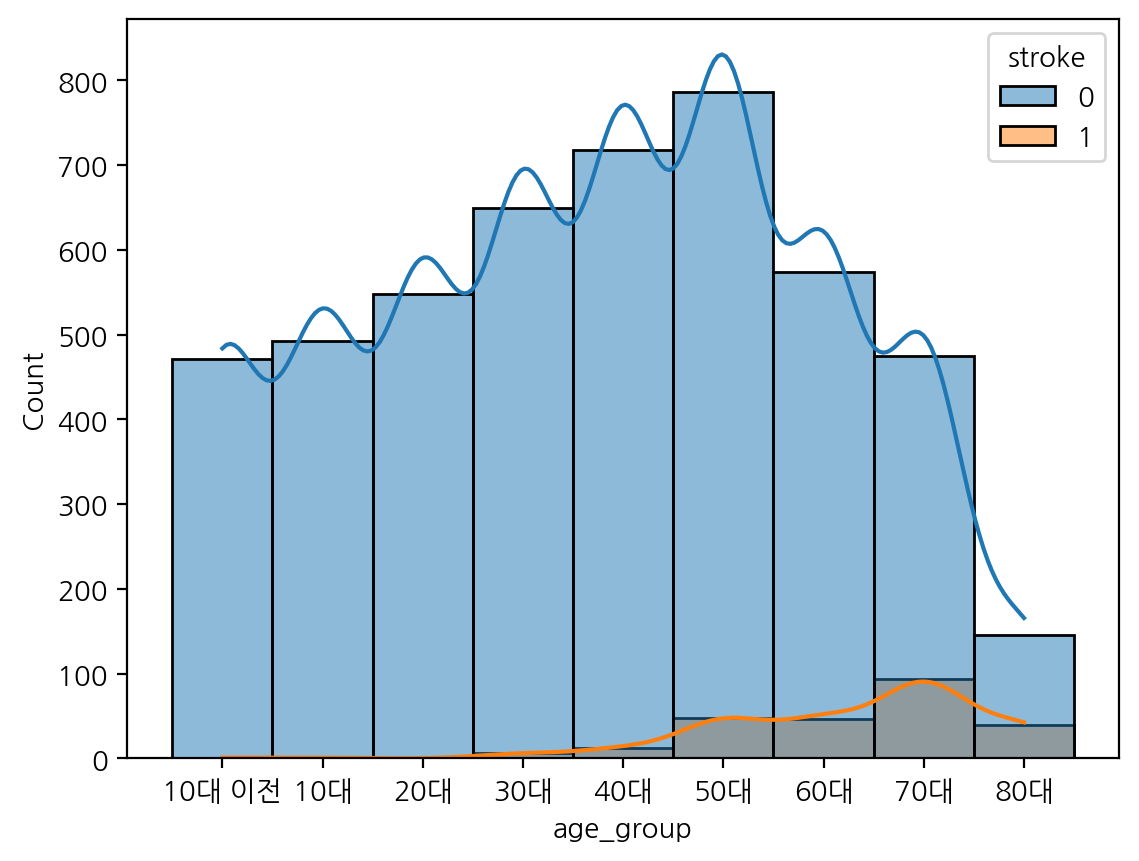

In [16]:
sns.histplot(data = df, x ="age_group", hue = "stroke", kde = True)

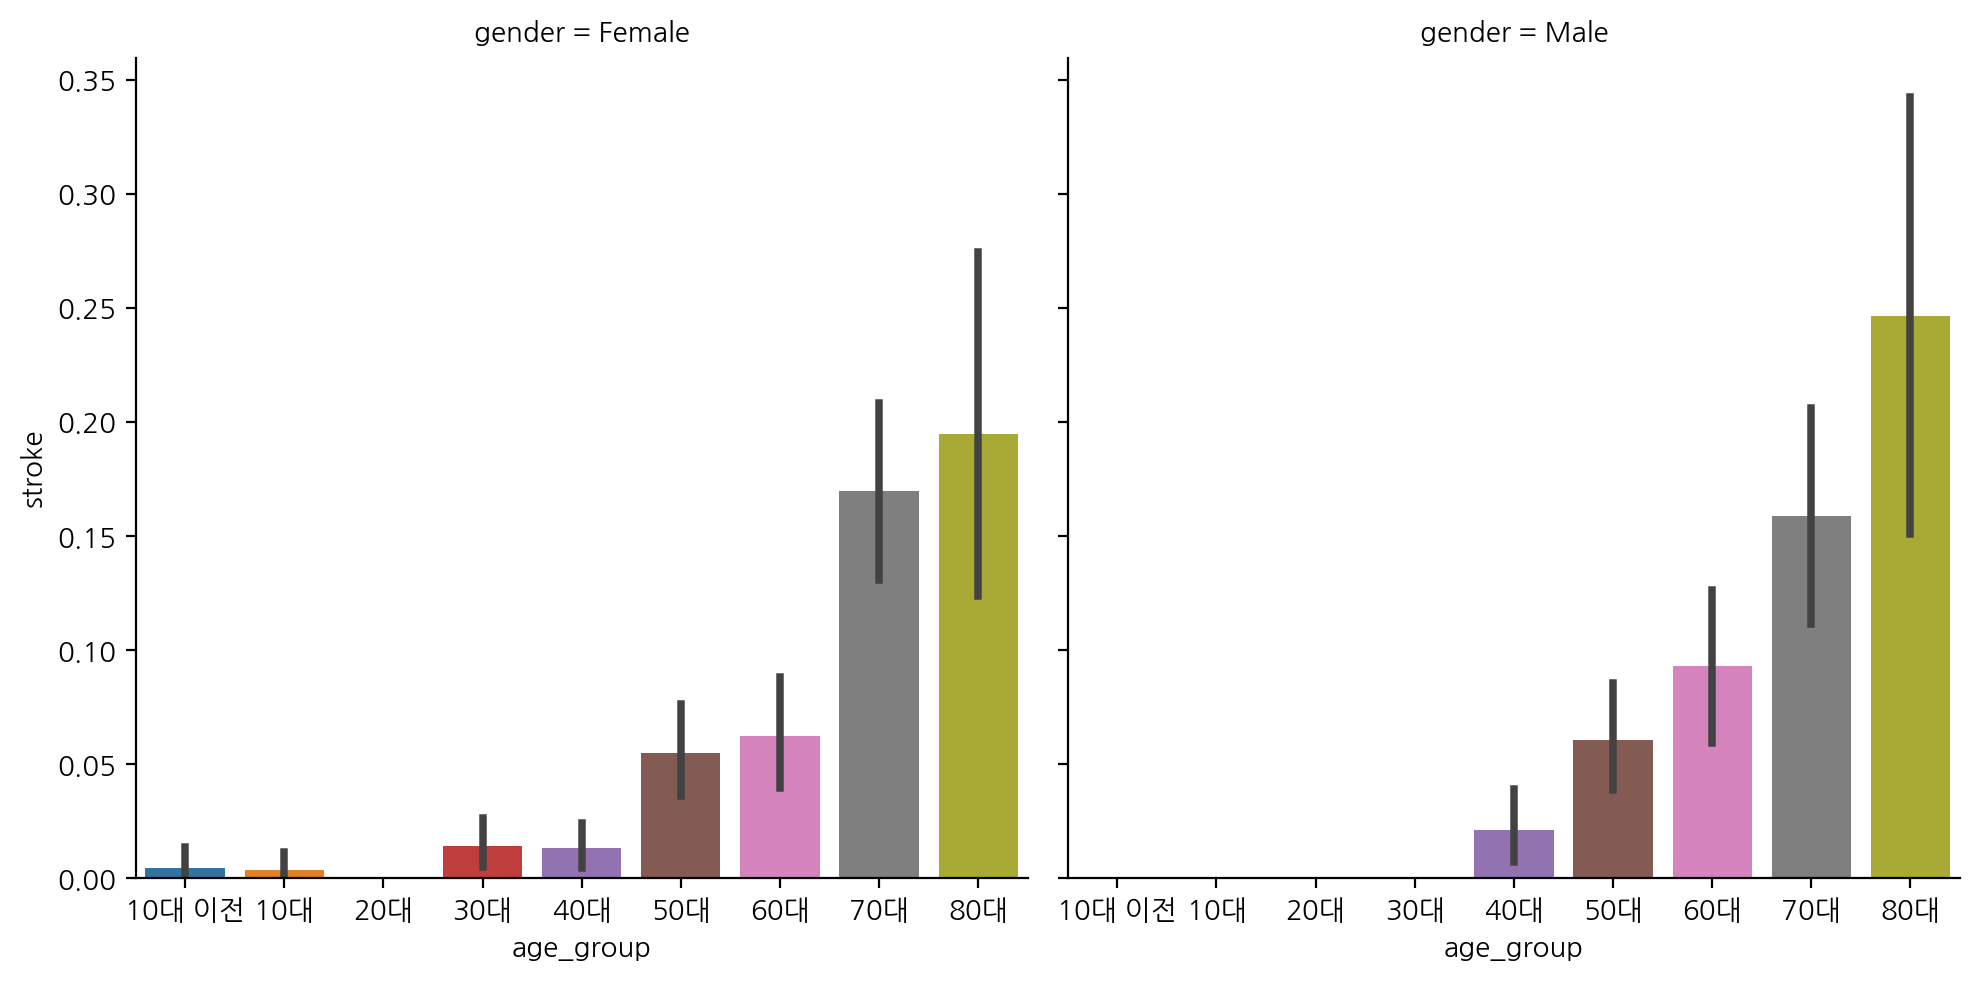

In [11]:
sns.catplot(data = df, x="age_group", y = "stroke", col ="gender", kind = "bar")